# The MATPLOTLIB API
### Pandas used the matplotlib api to create charts and visualize data
* This an integration with the main matlotlib library

In [1]:
import matplotlib.style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcdefaults()

# The Plot Method
### You can visualize a DataFrame by using the .plot() method
* This creates a line chart by default, using the row index as the x-axis and plotting each numerical column as a seperate series on the y-axis

In [ ]:
transactions = pd.read_csv("../data_visualization/transactions.csv", parse_dates=["date"])
transactions.head()

<Axes: >

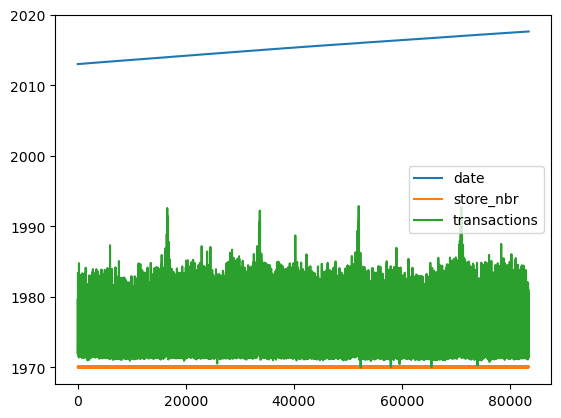

In [3]:
transactions.plot()

<Axes: xlabel='date'>

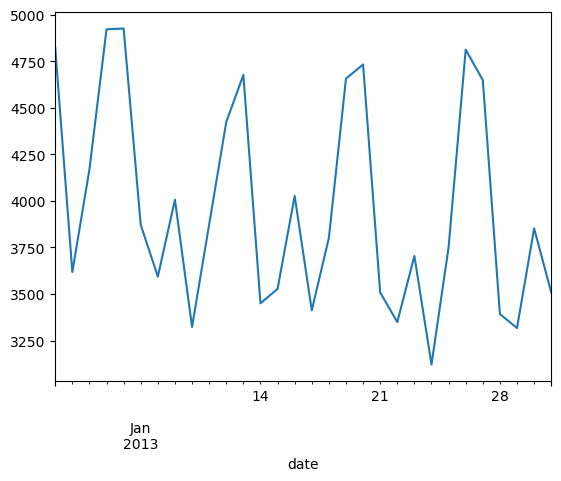

In [4]:
transactions.query("store_nbr == 44").set_index("date").loc["2013-01", "transactions"].plot()

In [5]:
transactions_44 = transactions.loc[transactions["store_nbr"] == 44, ["date", "transactions"]]
transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: xlabel='date'>

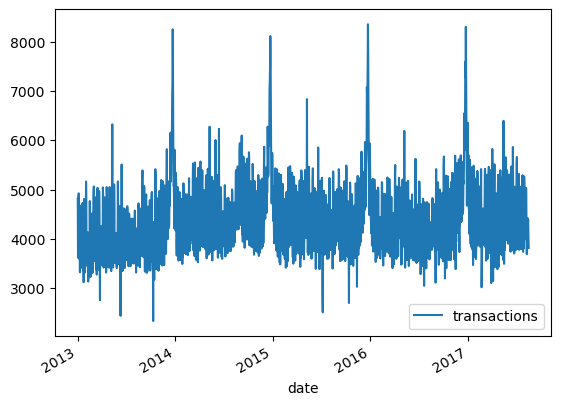

In [6]:
transactions_44.set_index("date").plot()

<Axes: xlabel='date'>

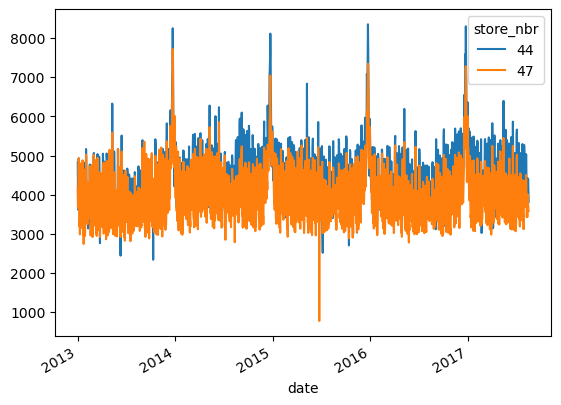

In [7]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot()
 )

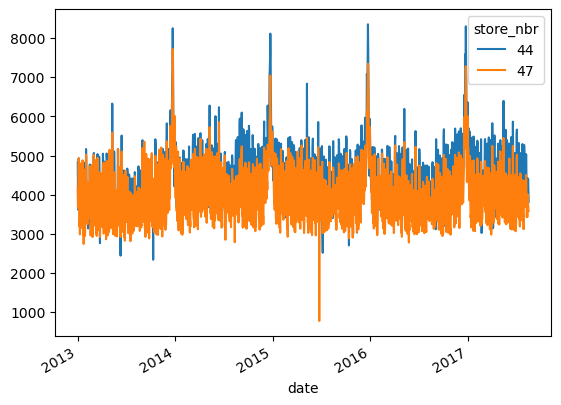

In [8]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot()
 );

# Chart Formatting
### You can modify the chart formmating by using .plot() method arguments

## Chart Titles
### You can customize chart titles and axis lables to increase understanding

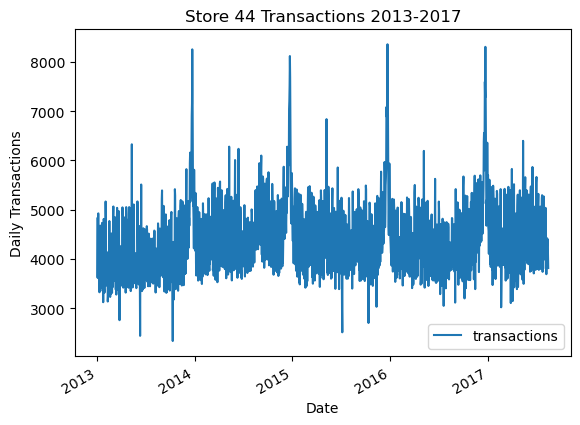

In [9]:
transactions_44.set_index('date').plot(
    title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions"
);

# Chart Colors
### You can modify the series colors by using common color names or hex codes

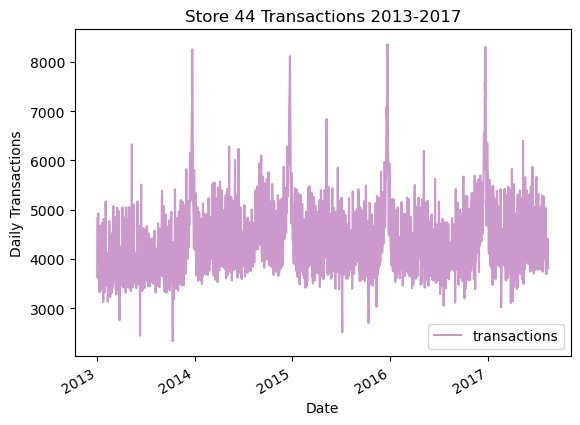

In [10]:
transactions_44.set_index('date').plot(
    title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    color="purple",
    alpha=.4
);

# Line Style
### Line charts are solid by default, but you can change the line style if needed

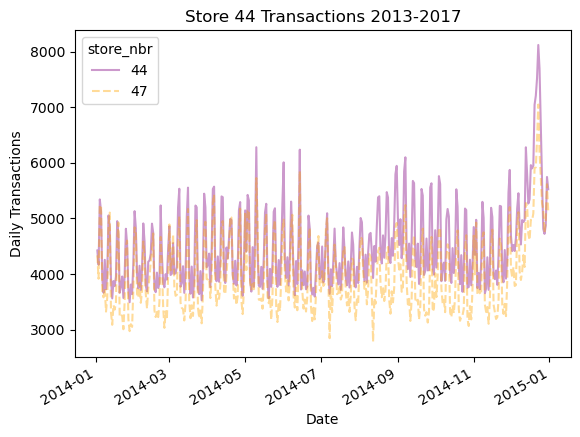

In [11]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    color=["purple", "orange"],
    alpha=.4,
    style=["-", "--"] # line style here
 )
 );

# Chart Legend
### The 'legend' .plot() argument lets you add or remove the legend
* This can be useful in some scenarios, but in others you will want to reposition the legened

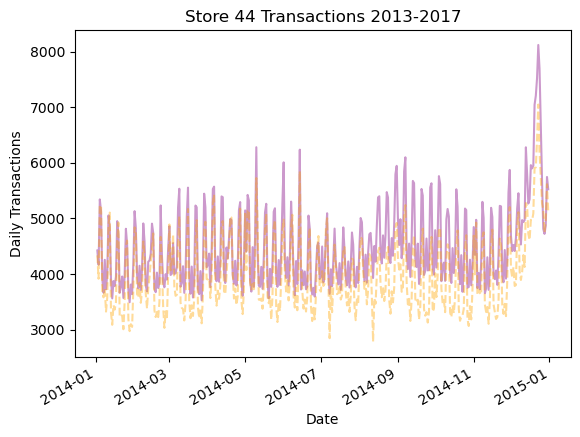

In [12]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    color=["purple", "orange"],
    alpha=.4,
    style=["-", "--"],
    legend=False # This removed the legend
 )
 );

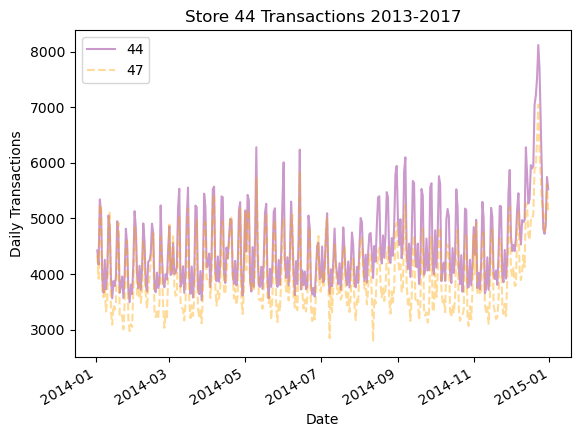

In [13]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    color=["purple", "orange"],
    alpha=.4,
    style=["-", "--"] 
 )
 ).legend(loc="best") # This method looks for the most white space in a logical area to place the legend
# other method arguments can also place the legend like legend(loc="center left")

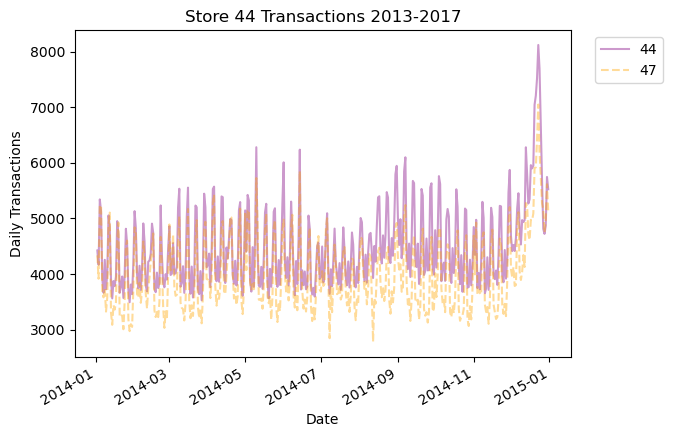

In [14]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    color=["purple", "orange"],
    alpha=.4,
    style=["-", "--"] 
 )
 ).legend(bbox_to_anchor=(1.2, 1));
# bbox or bounding box can be a more granular way to position with x, y coordinates

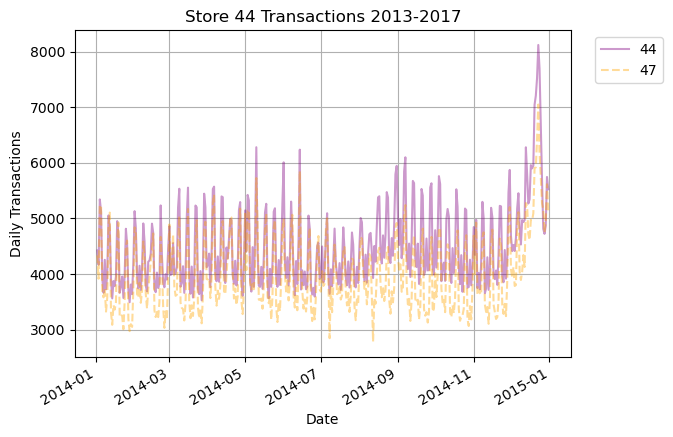

In [15]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    color=["purple", "orange"],
    alpha=.4,
    style=["-", "--"],
    grid=True # gridlines can also be added
 )
 ).legend(bbox_to_anchor=(1.2, 1));


# Chart Styles
### Matplotlib & Seaborn have premade style templates that can be applied to charts
* Once a style is set, it will automatically be apoplied to all charts

In [16]:
import seaborn as sns

sns.set_style("darkgrid")


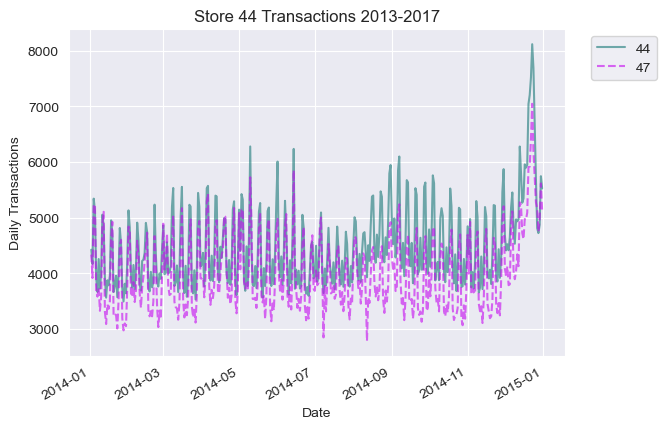

In [21]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    alpha=.6,
    color=["#187878", "#c507f0"],
    style=["-", "--"],
    grid=True # gridlines can also be added
 )
 ).legend(bbox_to_anchor=(1.2, 1));

# Subplots
### You can leverage subplots to create a seperate chart for each series

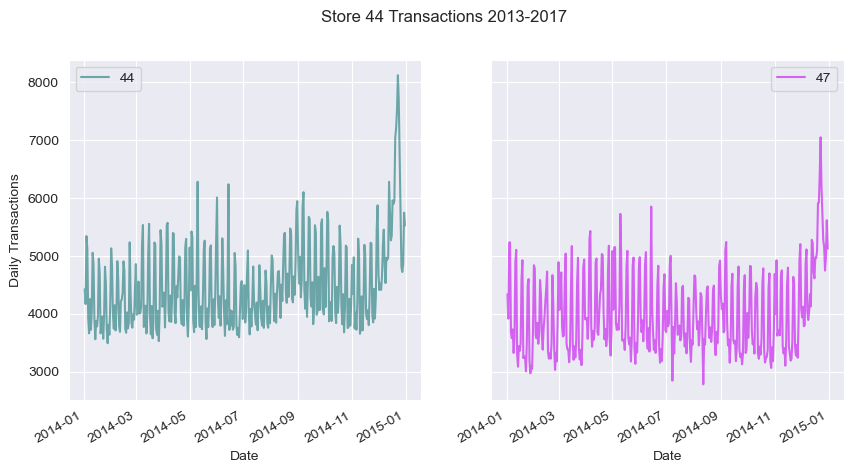

In [31]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
    xlabel="Date",
    ylabel="Daily Transactions",
    alpha=.6,
    color=["#187878", "#c507f0"],
    subplots=True,
    layout=(1, 2),
    sharey=True,
    figsize=(10, 5)
 )
 );